In [1]:
1 + 1

2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [3]:
from my_tools import *

In [4]:
# Q_LITECOIN
LTC = CoinDataMgr(blocksci_path="/home/ubuntu/litecoin_disk3",
                  path_to_clusters="/home/ubuntu/~/clusters_l2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/litecoin")

Got 1421537 blocks
Got 9312234 clusters


In [5]:
LTC[S_GINIS].readAll()
LTC[S_REL_FLOWS].readAll()
LTC[S_FEES].readAll()
LTC[S_NCS].readAll()
LTC[S_UNSPENTS].readAll()
LTC[S_NONEMPTY_CLS].readAll()
LTC[S_CLS_CNTS].readAll()
LTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_log21.json', key is 'log21'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
  Got 'int1000b_relativeFlowVolumes_par_cutTop1.5.json', key is 'par_cutTop1.5'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_unspents'...
  Got 'int1000b_unspents_par.json', key is 'par'
Finish
Reading 

In [20]:
tag = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'', S_REL_FLOWS:'par_cutTop1.5', S_FEES:'par',
                                   S_NONEMPTY_CLS:'par', S_CLS_CNTS: 'usingNpMap'})
tag_filtered = LTC.rollingMeanAllMetrics(allMetrics_tag=tag, common_win=5)

Gathered under tag 'nonEmptyClustersCounts=par_relativeFlowVolumes=par_cutTop1.5_activeClustersCounts=usingNpMap_fees=par_ginisOfClustersWealth=_NacamotoCoefs='


/home/ubuntu/thesis_work/my_tools.py:1099: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


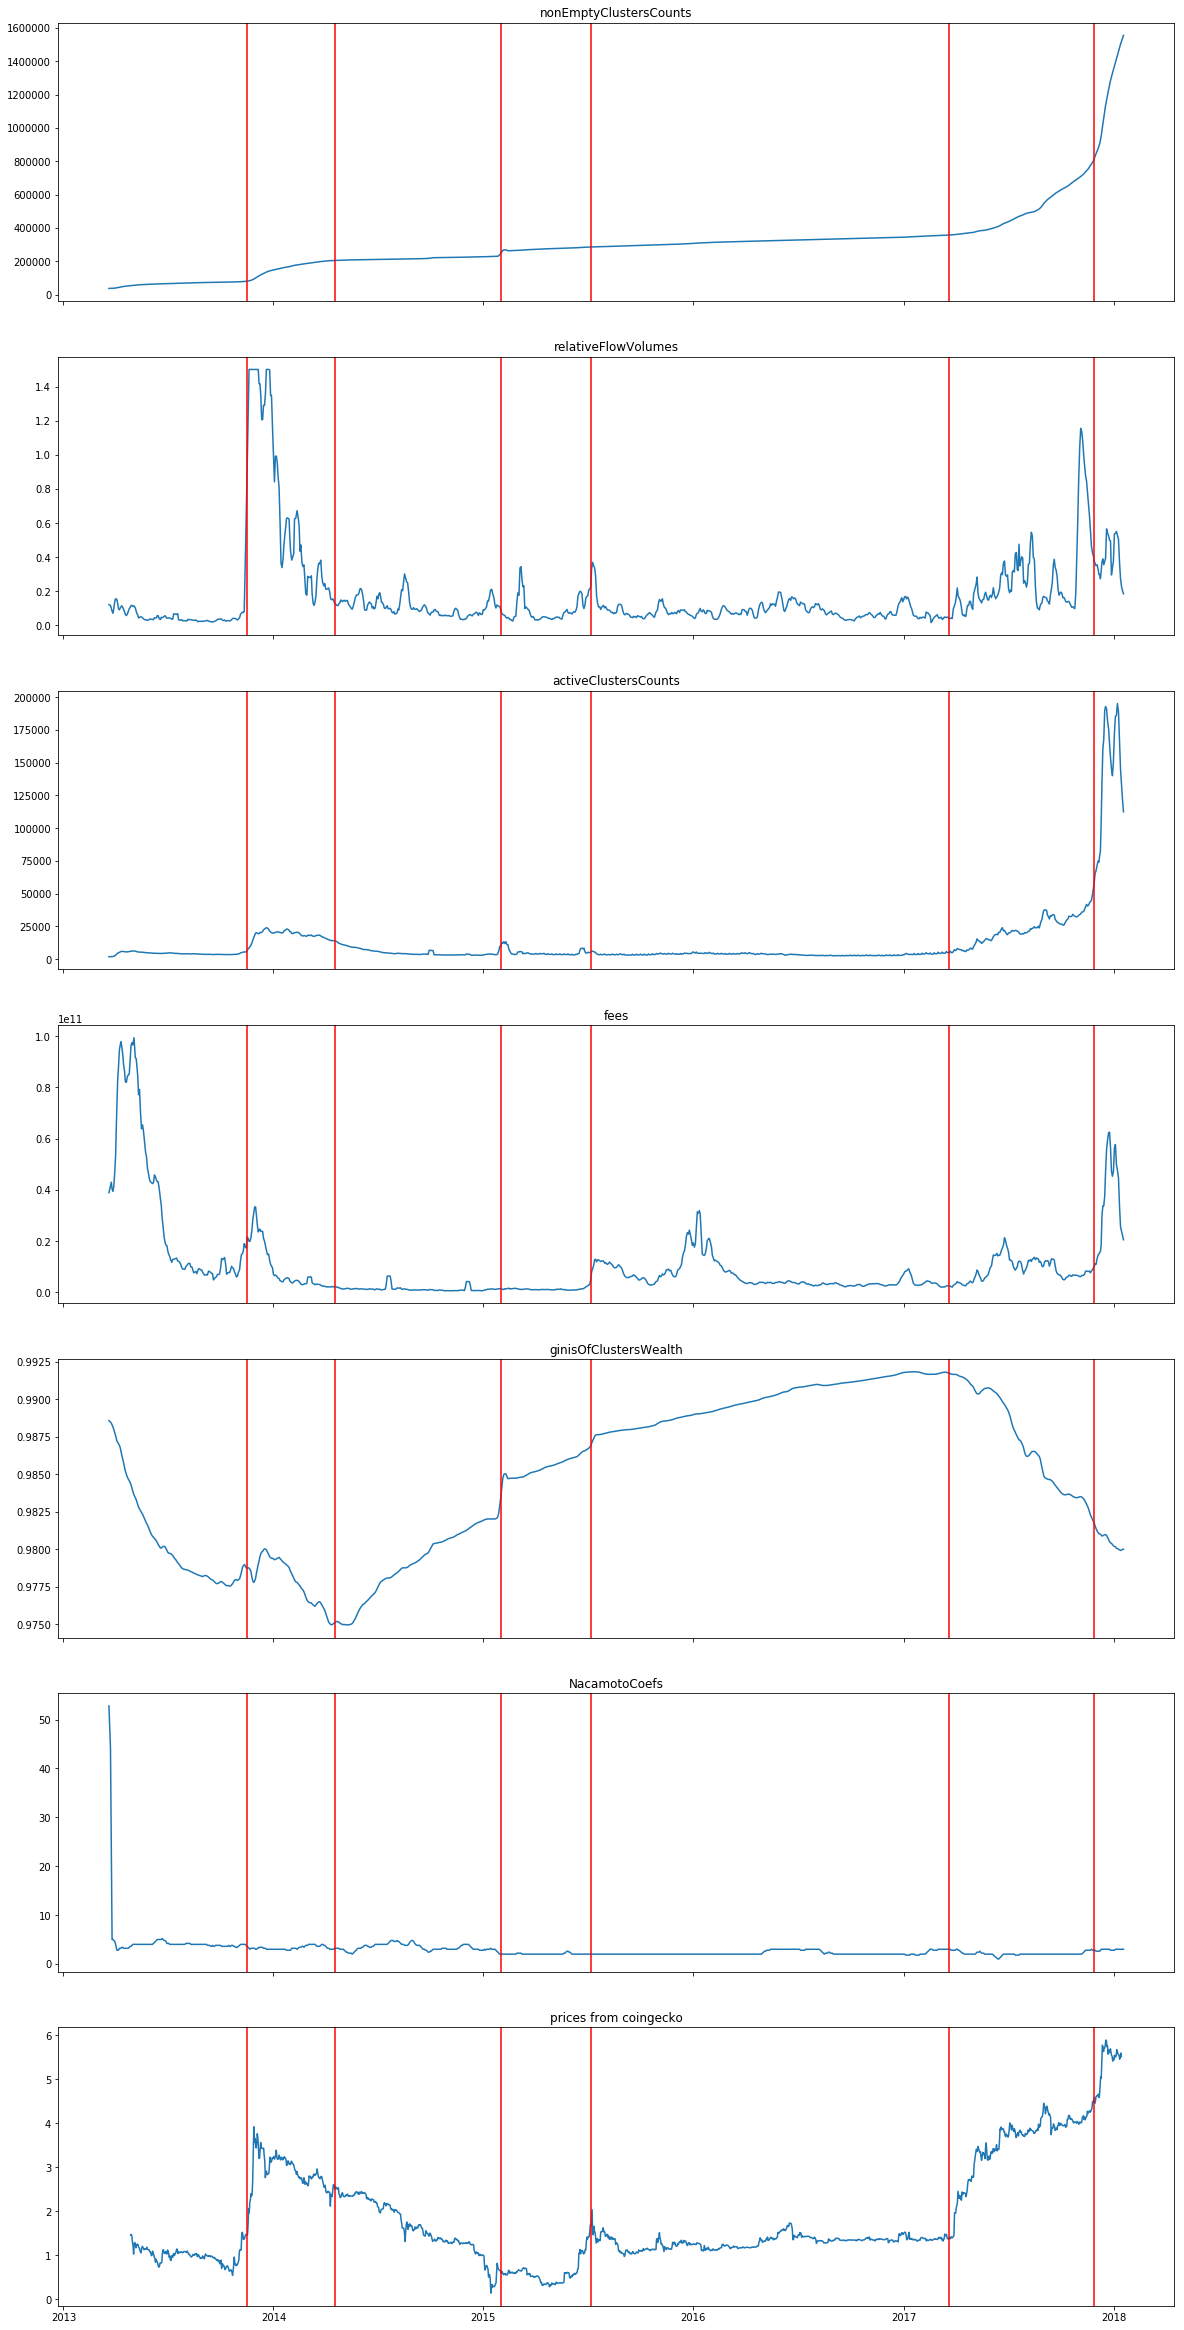

In [25]:
_ = LTC.drawGraph(allMetrics_tag=tag_filtered, prices_key='coingecko', begin=315, end=1350,
                  vlines=[460, 550, 720, 810, 1170, 1320])

In [47]:
#_ = LTC.drawGraph({S_REL_FLOWS: 'par'}, prices_key='coingecko', begin=330, end=400)

In [29]:
_.savefig('litecoin_from350k_allMetrics_meanWnd5.png')

In [11]:
relflows = np.array(LTC[S_REL_FLOWS]['par'])

In [17]:
relflows[relflows > 1.5] = 1.5

In [19]:
LTC[S_REL_FLOWS].v['par_cutTop1.5'] = list(relflows)

In [20]:
LTC[S_REL_FLOWS].save('par_cutTop1.5')

Saving "par_cutTop1.5" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_relativeFlowVolumes_par_cutTop1.5" file


In [55]:
ginis_relFlows_fees_ncs_unspents = np.array([
    LTC[S_GINIS][''],
    LTC[S_REL_FLOWS]['par'],
    LTC[S_FEES]['par'],
    LTC[S_NCS][''],
    LTC[S_UNSPENTS]['par'],
], dtype=np.float)

In [56]:
ginis_relFlows_fees_ncs_unspents.shape

(5, 1422)

In [48]:
np.where(np.isnan(ginis_relFlows_fees_ncs_unspents[4]))

(array([   0, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381,
        1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392,
        1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403,
        1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414,
        1415, 1416, 1417, 1418, 1419, 1420, 1421]),)

In [57]:
%time corcoef = np.corrcoef(ginis_relFlows_fees_ncs_unspents[:, 1:1372])
corcoef

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 476 µs


array([[ 1.        , -0.05367655,  0.06767077, -0.12355852, -0.00648248],
       [-0.05367655,  1.        ,  0.10985525, -0.09528974,  0.06736935],
       [ 0.06767077,  0.10985525,  1.        , -0.03246223,  0.16626349],
       [-0.12355852, -0.09528974, -0.03246223,  1.        , -0.14790599],
       [-0.00648248,  0.06736935,  0.16626349, -0.14790599,  1.        ]])

In [58]:
%time corcoef = np.corrcoef(ginis_relFlows_fees_ncs_unspents[:, 1200:1350])
corcoef

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 424 µs


array([[ 1.        , -0.29436915, -0.39800714, -0.6230479 , -0.38264296],
       [-0.29436915,  1.        ,  0.30894969,  0.21577679,  0.12020116],
       [-0.39800714,  0.30894969,  1.        ,  0.41965462,  0.45882592],
       [-0.6230479 ,  0.21577679,  0.41965462,  1.        ,  0.34954514],
       [-0.38264296,  0.12020116,  0.45882592,  0.34954514,  1.        ]])

In [59]:
%time corcoef = np.corrcoef(ginis_relFlows_fees_ncs_unspents[:, 500:1150])
corcoef

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 410 µs


array([[ 1.        , -0.32821558,  0.3205815 , -0.6766441 ,  0.04489465],
       [-0.32821558,  1.        ,  0.03262272,  0.22190378,  0.0892187 ],
       [ 0.3205815 ,  0.03262272,  1.        , -0.29695626,  0.00405623],
       [-0.6766441 ,  0.22190378, -0.29695626,  1.        ,  0.01873498],
       [ 0.04489465,  0.0892187 ,  0.00405623,  0.01873498,  1.        ]])

In [29]:
my_arr = np.array([[1., 2, 3], [3, 4, np.nan]])

In [30]:
np.corrcoef(my_arr)

array([[  1.,  nan],
       [ nan,  nan]])

In [114]:
#LTC.allMetrics[tag_l]

In [6]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'', S_REL_FLOWS:'par', S_FEES:'par', S_UNSPENTS:'par'})
tag_filtered_l = LTC.rollingMeanAllMetrics(allMetrics_tag=tag_l, common_win=5)

Gathered under tag 'unspents=par_fees=par_NacamotoCoefs=_ginisOfClustersWealth=_relativeFlowVolumes=par'


/home/ubuntu/thesis_work/my_tools.py:811: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


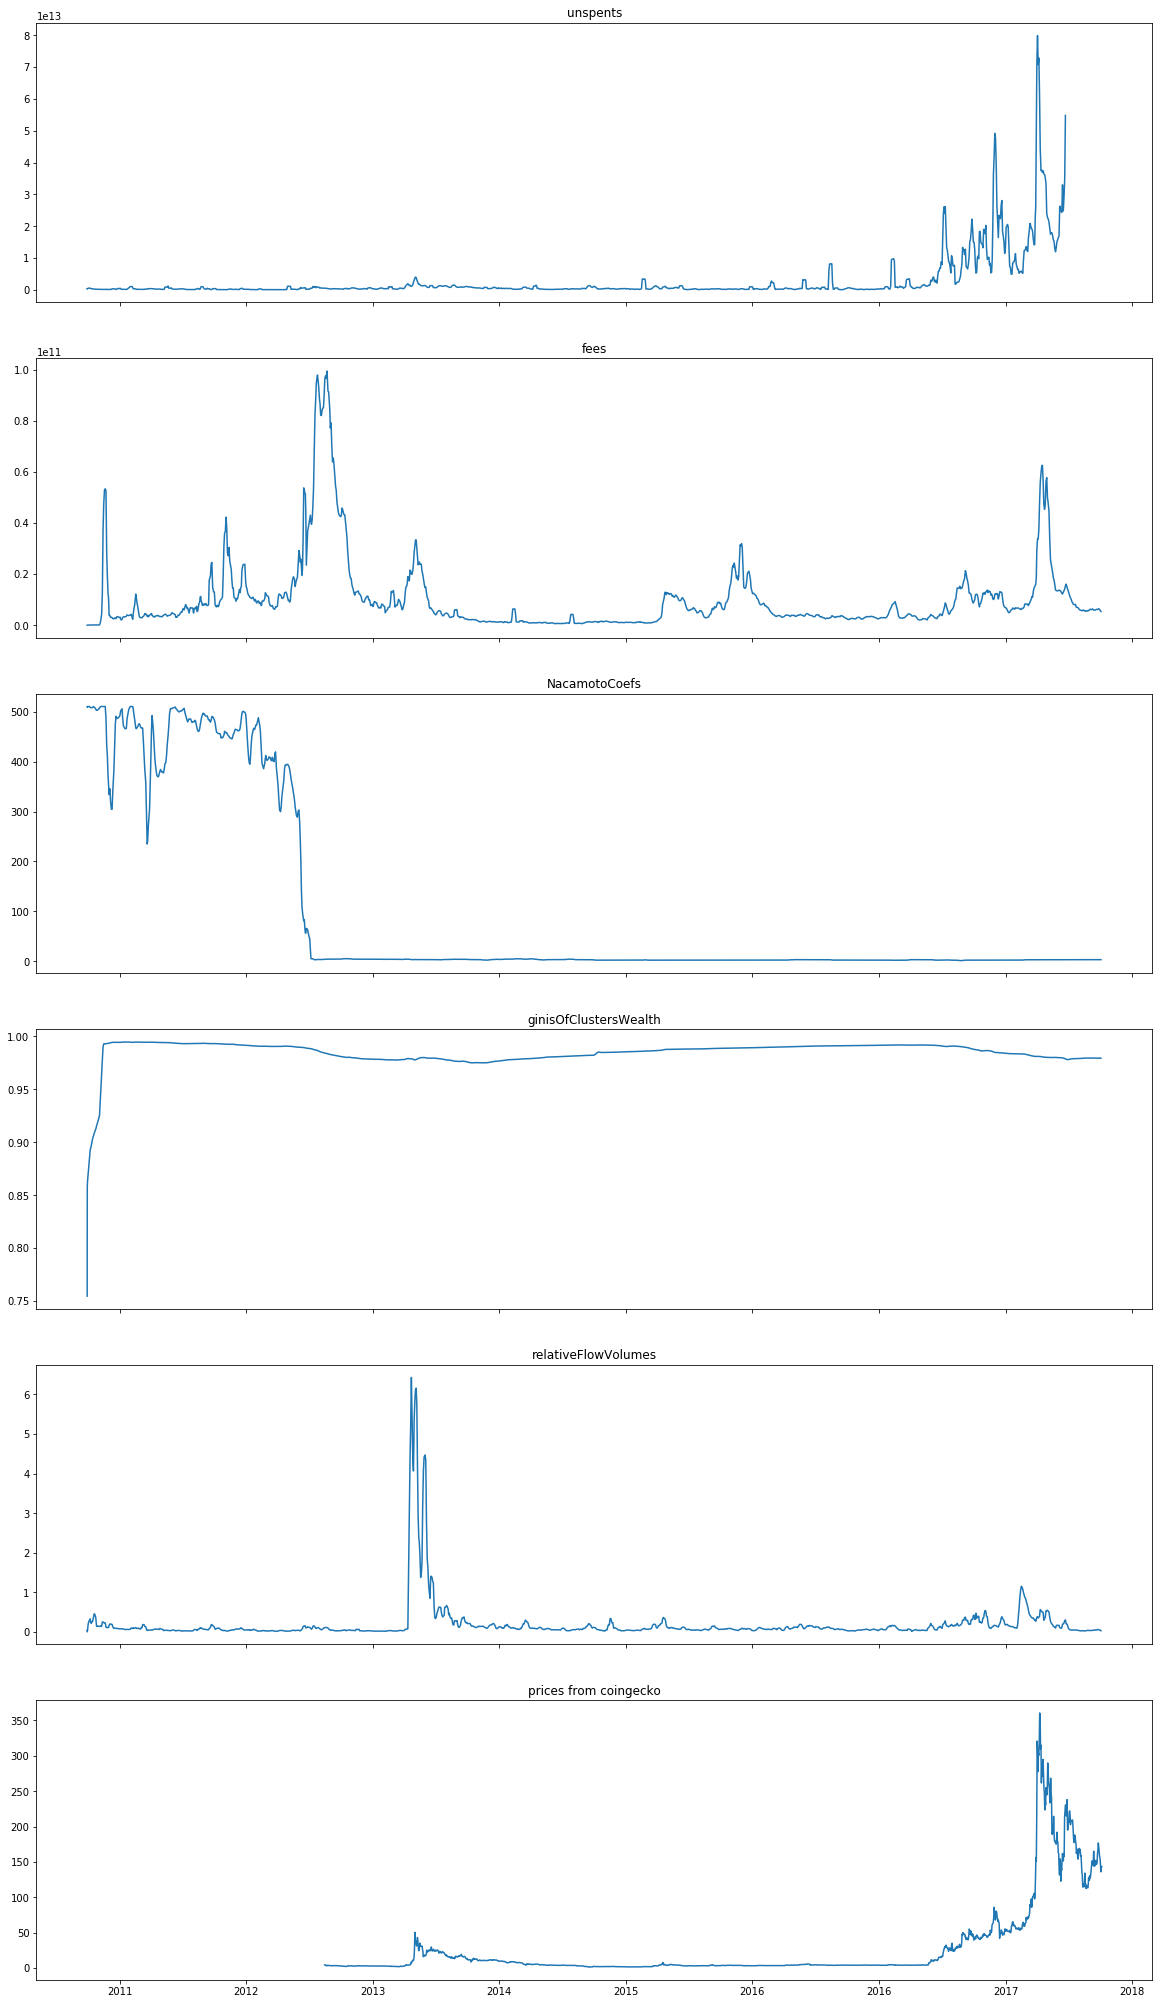

In [7]:
_ = LTC.drawGraph(allMetrics_tag=tag_filtered_l, prices_key='coingecko')

In [117]:
_.savefig('litecoin_win5.png')

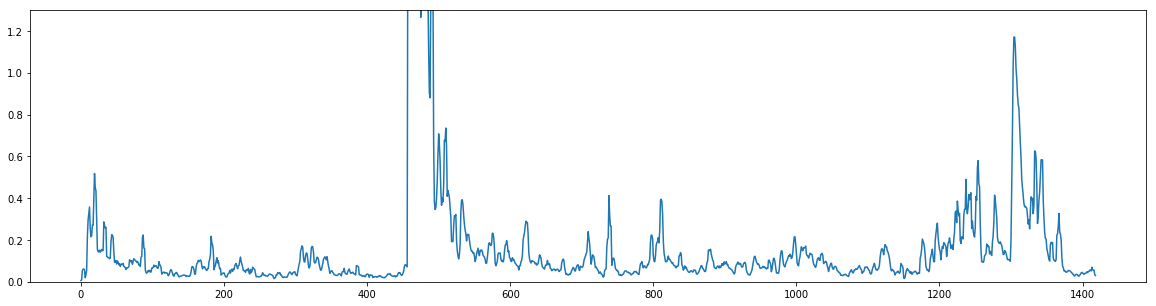

In [19]:
meaned_relflows = running_mean(LTC[S_REL_FLOWS]['par'], 4)
plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.set_ylim(top=1.3)
ax.plot(meaned_relflows)

In [13]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [15]:
running_mean(np.array([1, 2, 3, 4]), 3)

array([ 2.,  3.])

In [31]:
LTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
Finish


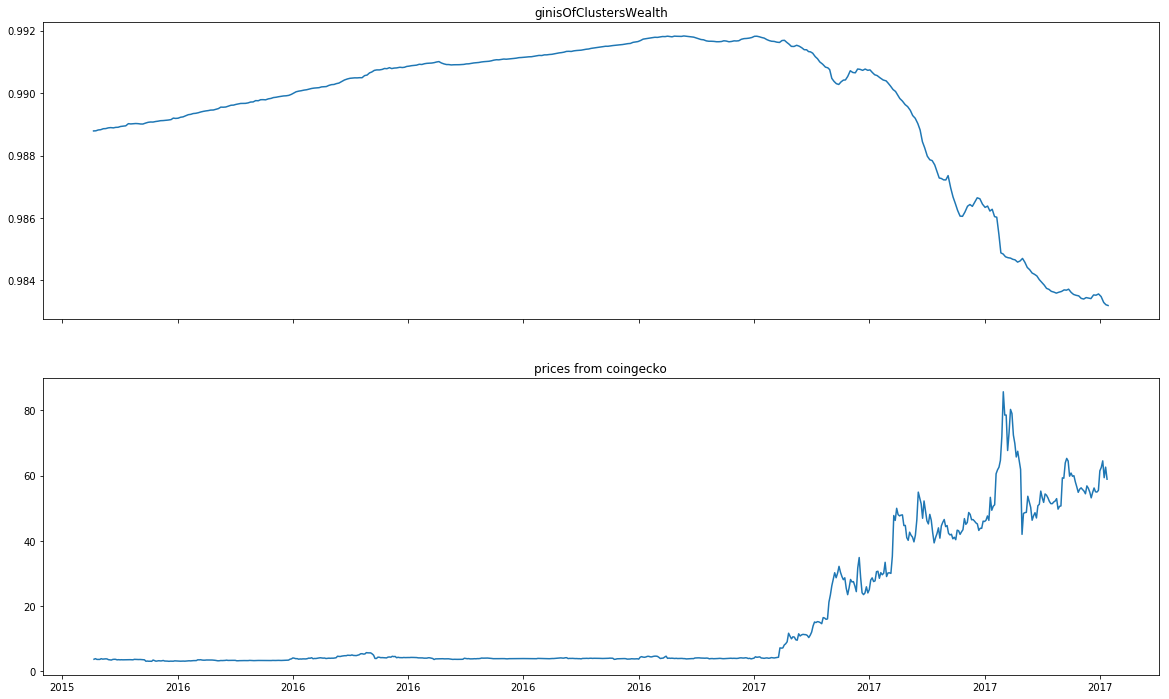

In [188]:
_ = LTC.drawGraph({S_GINIS: ''}, prices_key='coingecko', begin=900, end=-110)

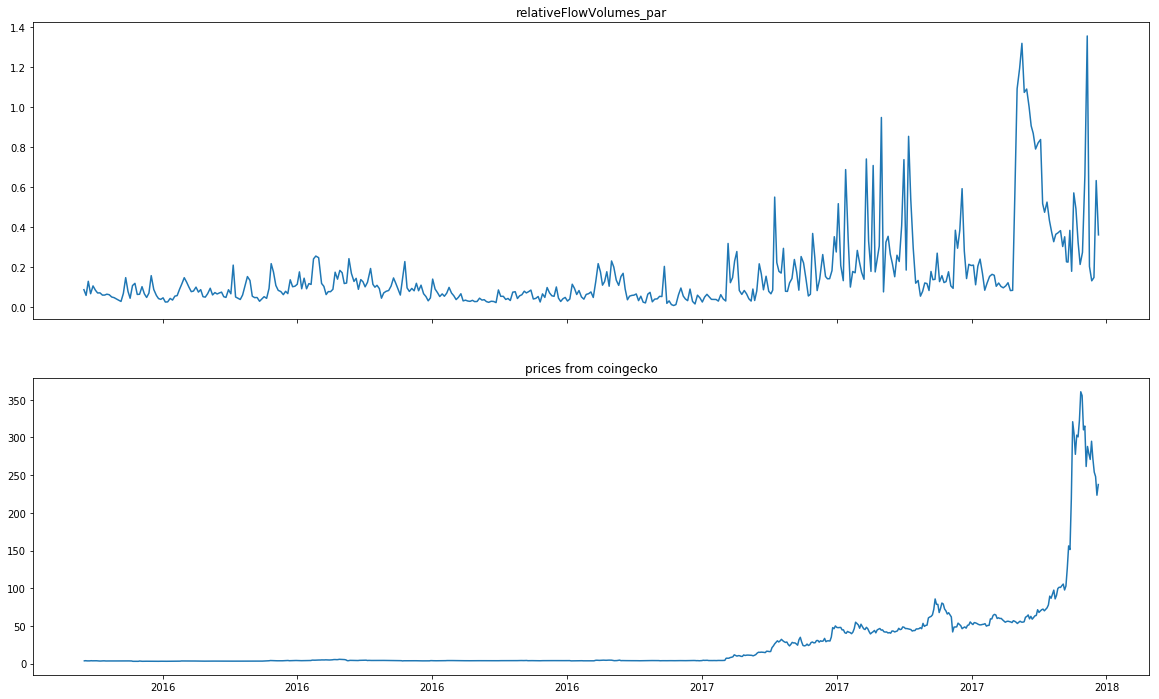

In [58]:
_ = LTC.drawGraph({S_REL_FLOWS: 'par'}, prices_key='coingecko', begin=900, end=-80)

In [57]:
LTC[S_REL_FLOWS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
Finish


In [5]:
LTC[S_MAP_A2C].read('np')

There is already np version of data, stop


In [6]:
LTC.getNonEmptyClustersCounts()

Work time 483.56s


In [7]:
LTC[S_NONEMPTY_CLS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_nonEmptyClustersCounts_par" file


In [37]:
LTC[S_NONEMPTY_CLS].read('par')

In [61]:
LTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


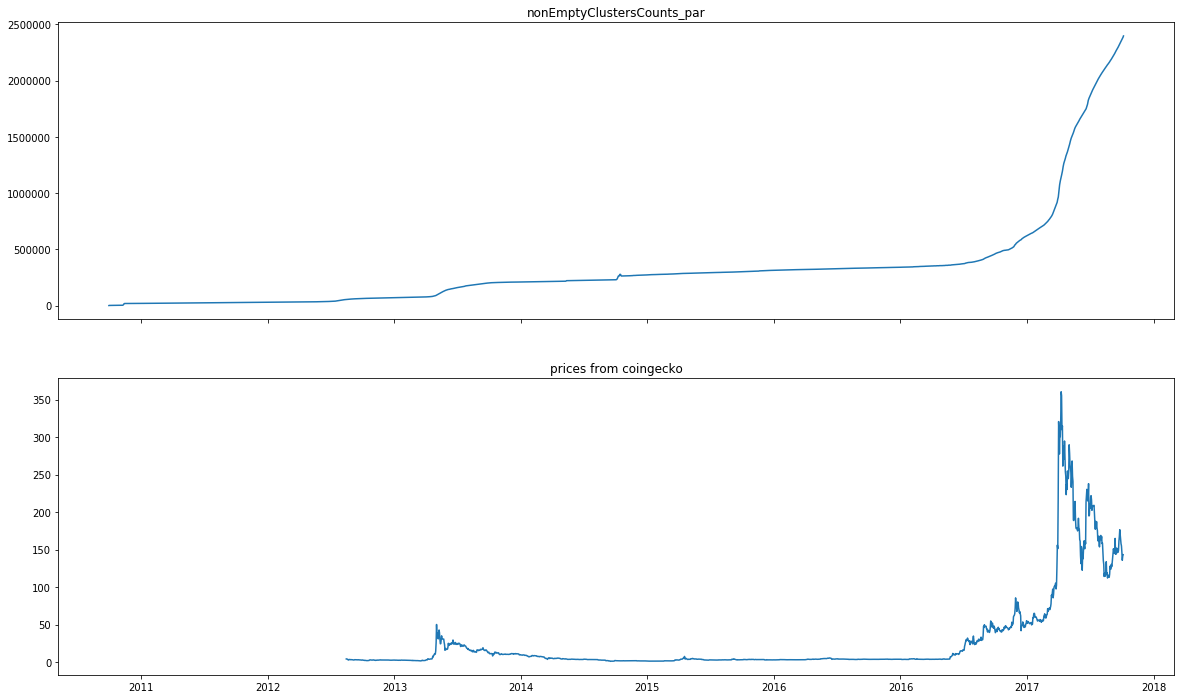

In [62]:
_ = LTC.drawGraph({S_NONEMPTY_CLS: 'par'}, prices_key='coingecko')

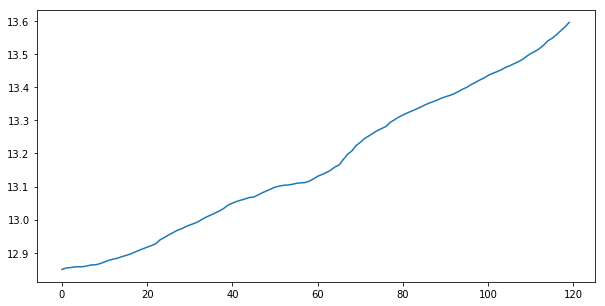

In [45]:
plt.figure(figsize=(10,5))
plt.plot(np.log(np.array(LTC[S_NONEMPTY_CLS]['par']))[1200:1320])

In [136]:
LTC.blocks[0].time

datetime.datetime(2011, 10, 7, 7, 31, 5)

In [32]:
LTC.getFees()

Work time 20.28s


In [33]:
LTC.getFees(key='nonPar')

Work time 2.05s


In [34]:
LTC[S_FEES]['par'] == LTC[S_FEES]['nonPar']

True

In [35]:
LTC[S_FEES]['par'][::100]

[0,
 4164100001,
 10995638340,
 23895947357,
 12943947286,
 4845863997,
 918544976,
 585096759,
 1220315740,
 8934654377,
 4576278347,
 3269669314,
 8606155703,
 8130656532,
 5514913174]

In [18]:
LTC[S_NCS].readAll()
LTC[S_ADDS_CNTS].readAll()
LTC[S_CLS_CNTS].readAll()
LTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_NacamotoCoefs'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_activeAddressesCounts'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_activeClustersCounts'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
Finish


In [20]:
#LTC_2k.getMapAddress2Cluster(key='np')

In [8]:
LTC[S_MAP_A2C].read('np')

In [18]:
LTC.getActiveClustersCounts('usingNpMap')

Work time 752.54s


In [19]:
LTC[S_CLS_CNTS].save('usingNpMap')

Saving "usingNpMap" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_activeClustersCounts_usingNpMap" file


In [13]:
LTC.getFlowAndIncomeVolume('non')

Work time 305.64s


In [36]:
LTC.getFlowAndIncomeVolume('nonPar')

Work time 1040.02s


In [9]:
# TESTING
LTC.getFlowAndIncomeVolume('nonPar')

Work time 1047.93s


In [10]:
# TESTING
LTC.getFlowAndIncomeVolume('par')

Work time 240.68s


In [11]:
# Testing
LTC[S_FLOWS_INCOMES]['par'] == LTC[S_FLOWS_INCOMES]['nonPar']

True

In [12]:
# Testing
LTC[S_FLOWS_INCOMES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_flowAndIncomeVolumes_par" file


In [37]:
LTC[S_FLOWS_INCOMES]['par'] == LTC[S_FLOWS_INCOMES]['nonPar']

True

In [ ]:
LTC[S_FLOWS_INCOMES]['np_']

In [14]:
LTC[S_FLOWS_INCOMES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_flowAndIncomeVolumes_par" file


In [35]:
LTC[S_FLOWS_INCOMES].read('par')

In [17]:
LTC.getRelativeFlowVolumes()
LTC[S_REL_FLOWS].save('par')

There is already par version of data, stop
Work time 0.0s
Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_relativeFlowVolumes_par" file


In [46]:
#LTC.d[S_MAP_A2C].save('np', check=False)

Saving "np" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_map_address2cluster_np" file


In [23]:
LTC.getActiveClustersCounts(key='usingNpMap')

Work time 0.05s


In [62]:
len(LTC[S_CLS_CNTS]['usingNpMap'])

1422

In [128]:
%time flowSum2_l = checkFlowSum2(LTC.blocks)
flowSum2_l

CPU times: user 6min 35s, sys: 836 ms, total: 6min 36s
Wall time: 6min 36s


0

In [180]:
%time balances_native_1m_l = LTC.cl_mgr.clusters().balance(1000000)

CPU times: user 7min 29s, sys: 11.4 s, total: 7min 40s
Wall time: 7min 39s


In [176]:
zero_bals = np.zeros(len(LTC.cl_mgr.clusters()))
%time balances_np2_1m_l, bad_blocks = getClustersBalanceChangeBlocksNp2(LTC.blocks[:1000000], LTC[S_MAP_A2C]['np'], zero_bals)

Et ya2!
CPU times: user 6min 34s, sys: 44 ms, total: 6min 34s
Wall time: 6min 34s


In [190]:
zero_bals = np.zeros(len(LTC.cl_mgr.clusters()))
%time balances_np_1m_l = getClustersBalanceChangeBlocksNp(LTC.blocks[:1000000], LTC[S_MAP_A2C]['np'], zero_bals)

CPU times: user 6min 6s, sys: 44 ms, total: 6min 6s
Wall time: 6min 6s


In [181]:
(balances_native_1m_l == balances_np2_1m_l).all()

False

In [191]:
(balances_np_1m_l == balances_np2_1m_l).all()

False

In [185]:
bal_diff = balances_native_1m_l - balances_np2_1m_l

In [189]:
len(bal_diff[bal_diff != 0])

325522

In [183]:
balances_native_1m_l.sum() - balances_np2_1m_l.sum()

-3754480922219596.0

In [192]:
balances_native_1m_l.sum() - balances_np_1m_l.sum()

-3743930089036942.0

In [193]:
balances_np2_1m_l.sum() - balances_np_1m_l.sum()

10550833182654.0

In [184]:
sum(bad_blocks.values())

361404256767

In [4]:
# Q_EXCHANGE_CLS
LTC[S_MAP_A2C].read('np')

In [5]:
%time balance_flow_txcnt_deltas =\
getClustersBalanceFlowTxCountChangeDictBlocksPar(LTC.chain, len(LTC.blocks), LTC[S_MAP_A2C]['np'])

CPU times: user 11min 16s, sys: 15.8 s, total: 11min 32s
Wall time: 14min 40s


In [6]:
balance_flow_txcnt_deltas_list = list(balance_flow_txcnt_deltas.items())

In [7]:
balance_flow_txcnt_deltas_list[30000]

(30004, array([987654, 987654,      1]))

In [8]:
%time bft_deltas_sorted = sorted(balance_flow_txcnt_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

CPU times: user 32.6 s, sys: 0 ns, total: 32.6 s
Wall time: 32.5 s


In [13]:
%time bft_deltas_sorted_tx_first = sorted(balance_flow_txcnt_deltas_list, key=lambda pair: (pair[1][2], pair[1][1], pair[1][0]))

CPU times: user 38.2 s, sys: 0 ns, total: 38.2 s
Wall time: 38.2 s


In [12]:
bft_deltas_sorted[-100:]

[(568860, array([         212517, 484026155366331,             225])),
 (1216116, array([              0, 485261599563200,              66])),
 (1500141, array([ 56000099500000, 489600070300000,             110])),
 (1309577, array([              0, 490071283279000,              52])),
 (573595, array([              0, 493418259851600,              74])),
 (2214045, array([              0, 497000195146364,              18])),
 (589322, array([              0, 499669649176800,              40])),
 (165372, array([              0, 505870109648368,              12])),
 (571685, array([              0, 506736286457220,              90])),
 (166938, array([              0, 509221790278804,              18])),
 (589364, array([              0, 511429332427760,              80])),
 (590070, array([              0, 528492524784262,              28])),
 (1082506, array([              0, 535557211149850,             460])),
 (1586445, array([              0, 537945385726832,              12])),


In [12]:
bft_deltas_sorted_filtered = [b for b in bft_deltas_sorted if b[1][1] != b[1][0]]

In [15]:
bft_deltas_sorted_cl_ids = [b[0] for b in bft_deltas_sorted]

In [16]:
bft_deltas_sorted_tx_first_cl_ids = [b[0] for b in bft_deltas_sorted_tx_first]

In [18]:
len(set(bft_deltas_sorted_cl_ids[-10:]) & set(bft_deltas_sorted_tx_first_cl_ids[-10:]))

2

In [20]:
set(bft_deltas_sorted_cl_ids[-10:]) & set(bft_deltas_sorted_tx_first_cl_ids[-10:])

{14953, 247409}

In [19]:
bft_deltas_sorted_tx_first[-5:]

[(18196, array([    21691111, 327801233195,       299223])),
 (133970, array([   161006221325, 901948207685281,          385191])),
 (479078, array([   123899258033, 553604659791687,          853503])),
 (83848, array([    717127481041, 2657106421847185,           972677])),
 (14953,
  array([    489834185426876, 1014195156614907258,            75752255]))]

In [21]:
for a_t in LTC[S_MAP_A2C]['np']:
    sub_map = LTC[S_MAP_A2C]['np'][a_t]
    print(len(sub_map[sub_map == 14953]))

934
11611353
11611353
11611353
382966
260029
0
11611353
382966


In [22]:
for a_t in LTC[S_MAP_A2C]['np']:
    sub_map = LTC[S_MAP_A2C]['np'][a_t]
    print(len(sub_map[sub_map == 247409]))

0
74015
74015
74015
0
0
0
74015
0


In [7]:

def add2cl(address):
    return LTC[S_MAP_A2C]['np'][address.type][address.address_num]

In [34]:
txs = set()
for b in LTC.chain[:50000]:
    for o in b.outputs:
        if add2cl(o.address) == 14953 and o.tx.input_count > 0:
            txs.add(o.tx)
    

In [35]:
len(txs)

63657

In [98]:
my_tx = list(txs)[0]

In [99]:
for i in my_tx.inputs:
    print(add2cl(i.address), i.value)
print('---------')
for o in my_tx.outputs:
    print(add2cl(o.address), o.value)


29314 5010000000
---------
29314 4493308044
14953 516691956


In [74]:
in_txs = set()
for b in LTC.chain[:50000]:
    for i in b.inputs:
        if add2cl(i.address) == 14953 and i.tx.output_count > 0:
            in_txs.add(i.tx)
    

In [75]:
len(in_txs)

747

In [80]:
my_in_tx = list(in_txs)[10]

In [81]:
for i in my_in_tx.inputs:
    print(add2cl(i.address), i.value)
print('---------')
for o in my_in_tx.outputs:
    print(add2cl(o.address), o.value)


14953 124951588
14953 583653683
14953 94900000000
---------
14953 1049271
18185 95607556000


In [189]:
withdraws = []
for b in LTC.chain[-110000:]:
    for t in b.txes:
        in_cls = set([add2cl(i.address) for i in t.inputs])
        if len(in_cls) == 1 and list(in_cls)[0] == 14953:
            out_cls = set([add2cl(o.address) for o in t.outputs])
            if 14953 in out_cls and len(out_cls - in_cls) == 1:
                withdraw_value = 0
                for o in t.outputs:
                    if add2cl(o.address) != 14953:
                        withdraw_value += o.value
                withdraw_cl = list(out_cls - in_cls)[0]
                withdraws.append((withdraw_cl, b.height, withdraw_value, t))

In [167]:
len(withdraws)

147143

In [168]:
len(set([w[0] for w in withdraws]))

97381

In [170]:
withdraw_tx = withdraws[0][3]

In [171]:
 withdraws[0]

(9010341,
 1391537,
 10000000,
 Tx(len(txins)=2, len(txouts)=2, size_bytes=336, block_height=1391537, tx_index=22790864))

In [172]:
for i in withdraw_tx.inputs:
    print(add2cl(i.address), i.value)
print('---------')
for o in withdraw_tx.outputs:
    print(add2cl(o.address), o.value)

14953 7081832
14953 10100000
---------
9010341 10000000
14953 7112032


In [190]:
coinputs = []
for b in LTC.chain[-110000:]:
    for t in b.txes:
        out_cls = set([add2cl(o.address) for o in t.outputs])
        if len(out_cls) == 2 and 14953 in out_cls:
            coinput_cl = list(out_cls - set([14953,]))[0]
            in_cls = set([add2cl(i.address) for i in t.inputs])
            if len(in_cls) == 1 and coinput_cl in in_cls:
                coinput_value = 0
                for o in t.outputs:
                    if add2cl(o.address) == 14953:
                        coinput_value += o.value
                coinputs.append((coinput_cl, b.height, coinput_value, t))

In [174]:
len(coinputs)

256591

In [135]:
len(coinputs)

15414

In [159]:
coinput_tx = coinputs[0][3]

In [160]:
for i in coinput_tx.inputs:
    print(add2cl(i.address), i.value)
print('---------')
for o in coinput_tx.outputs:
    print(add2cl(o.address), o.value)

6931804 99965513
6931804 2148948
---------
14953 100000000
6931804 1366461


In [161]:
coinputs[0]

(6931804,
 1391537,
 100000000,
 Tx(len(txins)=2, len(txouts)=2, size_bytes=373, block_height=1391537, tx_index=22790857))

In [192]:
coinputs_grouped = collections.defaultdict(list)
for cp in coinputs:
    coinputs_grouped[cp[0]].append(cp[1:3])
    
withdrawers_grouped = collections.defaultdict(list)
for wd in withdraws:
    withdrawers_grouped[wd[0]].append(wd[1:3])

In [140]:
list(withdrawers_grouped.keys())[:10]

[18690, 44548, 17925, 19207, 18185, 44554, 19970, 19726, 44626, 19221]

In [147]:
my_cl = 18185
coinputs_grouped[my_cl]

[(32498, 50000000000)]

In [148]:
withdrawers_grouped[my_cl]

[(12825, 98999000000),
 (12827, 489000000),
 (12829, 2894000000),
 (12986, 16299000000),
 (12988, 72299000000),
 (12993, 1799000000),
 (13064, 44974550),
 (13071, 2984000000),
 (14477, 95607556000),
 (14585, 43491494000),
 (14590, 39799000000),
 (15054, 17909000000),
 (15155, 17909000000),
 (18338, 1372100000),
 (19418, 596000000)]

In [193]:
coinputter_cls = list(coinputs_grouped.keys())
withdrawer_cls = list(withdrawers_grouped.keys())
print(len(coinputter_cls))
print(len(withdrawer_cls))
print(len(set(coinputter_cls) & set(withdrawer_cls)))

1172496
611034
116884


In [177]:
list(set(coinputter_cls) & set(withdrawer_cls))[:10]

[1245184,
 1474561,
 7110658,
 8421379,
 8716292,
 8323077,
 7471110,
 8355840,
 7274505,
 8323082]

In [180]:
my_cl = 1474561
coinputs_grouped[my_cl]

[(1396757, 400000000),
 (1397007, 1000000000),
 (1402298, 400000000),
 (1410144, 400000000),
 (1410144, 414765657),
 (1412510, 400000000),
 (1420056, 1000000000)]

In [181]:
withdrawers_grouped[my_cl]

[(1399972, 381300000), (1399974, 3999721114)]

In [194]:
my_zero3()

array([0, 0, 0])

In [21]:
def findMainFriend(ins_or_outs):
    all_friends = collections.defaultdict(my_zero)
    for io in ins_or_outs:
        all_friends[add2cl(io.address)] += io.value

    max_io, max_friend = 0, None
    for k, v in all_friends.items():
        if v > max_io:
            max_io = v
            max_friend = k
    all_value = sum(all_friends.values())
    if max_io > all_value * 0.99:
        return max_friend, all_friends[max_friend]
    return None, all_value

def getFriendsStats(blocks, target_cl):
    friend_clusters = collections.defaultdict(my_zero3)
    for b in blocks:
        for tx in b.txes:
            in_cls = set([add2cl(i.address) for i in tx.inputs])
            if target_cl in in_cls:
                main_outputer, main_output = findMainFriend(tx.outputs)
                updateBalanceFlowTxCount(friend_clusters[main_outputer], -main_output)
            
            out_cls = set([add2cl(o.address) for o in tx.outputs])
            if target_cl in out_cls:
                main_inputer, main_input = findMainFriend(tx.inputs)
                updateBalanceFlowTxCount(friend_clusters[main_inputer], main_input)
    return friend_clusters


In [220]:
%time friend_clusters = getFriendsStats(LTC.chain[-150000:], 14953)

CPU times: user 22min 39s, sys: 12 ms, total: 22min 39s
Wall time: 22min 39s


In [221]:
len(friend_clusters)

3269478

In [222]:
friend_clusters_list = list(friend_clusters.items())

In [223]:
friend_clusters_sorted = sorted(friend_clusters_list, key=lambda pair: (pair[1][1], pair[1][0], pair[1][2]))
friend_clusters_sorted[-10:]

[(2125553, array([150496304744620, 150496304744620,              18])),
 (2137014, array([ 79666791087221, 170197264945105,            1532])),
 (4773712, array([ 42695554795697, 219001554795697,            4883])),
 (8783523, array([-19587890913230, 249145554655946,             944])),
 (1500141, array([148299985400000, 261299985400000,              39])),
 (3170874, array([407754926386619, 407754926386619,              69])),
 (63333, array([1552311066916346, 2044628171908346,             1566])),
 (1072727, array([1774984535167645, 2662215135167645,            29029])),
 (None, array([-12084119047943618,  12169032635013678,            1062626])),
 (14953, array([ 14114335930939249, 171506278485485315,            7232737]))]

In [224]:
friend_clusters_sorted_210 = sorted(friend_clusters_list, key=lambda pair: (pair[1][2], pair[1][1], pair[1][0]))
friend_clusters_sorted_210[-10:]

[(63333, array([1552311066916346, 2044628171908346,             1566])),
 (2974220, array([-2541835423125,  5815738065781,           2131])),
 (2374556, array([2606962970703, 2648122324099,          3546])),
 (3555288, array([2301262973571, 7412689965259,          3684])),
 (937877, array([   -3236707666, 15217763292334,           3950])),
 (4773712, array([ 42695554795697, 219001554795697,            4883])),
 (6564832, array([4777027550200, 4783205550200,          8947])),
 (1072727, array([1774984535167645, 2662215135167645,            29029])),
 (None, array([-12084119047943618,  12169032635013678,            1062626])),
 (14953, array([ 14114335930939249, 171506278485485315,            7232737]))]

In [5]:
# Q_EXCHANGE_ADDS
start_time = time.time()
grouped_balance_flow_txcnt_deltas = []
group_size = 10000
groups_count = (len(LTC.blocks) - 1) // group_size + 1
for i in range(groups_count):
    balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksPar(LTC.chain,
                                                                                  start=group_size*i,
                                                                                  end=group_size*(i+1))
    grouped_balance_flow_txcnt_deltas.append(balance_flow_txcnt_deltas)
    print('{}%'.format(100 * i / groups_count))
print(time.time() - start_time)

0.0%
0.6993006993006993%
1.3986013986013985%
2.097902097902098%
2.797202797202797%
3.4965034965034967%
4.195804195804196%
4.895104895104895%
5.594405594405594%
6.293706293706293%
6.993006993006993%
7.6923076923076925%
8.391608391608392%
9.090909090909092%
9.79020979020979%
10.48951048951049%
11.188811188811188%
11.888111888111888%
12.587412587412587%
13.286713286713287%
13.986013986013987%
14.685314685314685%
15.384615384615385%
16.083916083916083%
16.783216783216783%
17.482517482517483%
18.181818181818183%
18.88111888111888%
19.58041958041958%
20.27972027972028%
20.97902097902098%
21.678321678321677%
22.377622377622377%
23.076923076923077%
23.776223776223777%
24.475524475524477%
25.174825174825173%
25.874125874125873%
26.573426573426573%
27.272727272727273%
27.972027972027973%
28.67132867132867%
29.37062937062937%
30.06993006993007%
30.76923076923077%
31.46853146853147%
32.16783216783217%
32.86713286713287%
33.56643356643357%
34.26573426573427%
34.96503496503497%
35.66433566433567%
36

Exception in thread Thread-409:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/multiprocess/pool.py", line 366, in _handle_workers
    pool._maintain_pool()
  File "/home/ubuntu/.local/lib/python3.5/site-packages/multiprocess/pool.py", line 240, in _maintain_pool
    self._repopulate_pool()
  File "/home/ubuntu/.local/lib/python3.5/site-packages/multiprocess/pool.py", line 233, in _repopulate_pool
    w.start()
  File "/home/ubuntu/.local/lib/python3.5/site-packages/multiprocess/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/multiprocess/context.py", line 267, in _Popen
    return Popen(process_obj)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/multiprocess/popen_fork.

AttributeError: 'NoneType' object has no attribute 'terminate'

In [ ]:
%time adds_balance_flow_txcnt_deltas = sumClusterDicts(grouped_balance_flow_txcnt_deltas)

In [ ]:
adds_BFT_deltas_list = list(adds_balance_flow_txcnt_deltas.items())

In [ ]:
%time BFT_deltas_sorted_120 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

In [ ]:
%time BFT_deltas_sorted_210 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][2], pair[1][1], pair[1][0]))

In [6]:
len(grouped_balance_flow_txcnt_deltas)

135

In [7]:
grouped_balance_flow_txcnt_deltas_134 = grouped_balance_flow_txcnt_deltas[:134]

In [9]:
add_BFT_deltas_dict_1340k_b = sumClusterDicts(grouped_balance_flow_txcnt_deltas_134)

In [10]:
del grouped_balance_flow_txcnt_deltas_134
del grouped_balance_flow_txcnt_deltas

In [12]:

group_size = 1000
print( (len(LTC.blocks) - 1) // group_size + 1)

1422


In [15]:
# Q_EXCHANGE_ADDS
start_time = time.time()
grouped_balance_flow_txcnt_deltas_from_1350k = []
group_size = 100
groups_count = (len(LTC.blocks) - 1) // group_size + 1
print(groups_count)
for i in range(13500, groups_count):
    balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksPar(LTC.chain,
                                                                                  start=group_size*i,
                                                                                  end=group_size*(i+1))
    grouped_balance_flow_txcnt_deltas_from_1350k.append(balance_flow_txcnt_deltas)
    print('{}%'.format(100 * i / groups_count))
print(time.time() - start_time)

14216
94.9634214969049%
94.97045582442318%
94.97749015194148%
94.98452447945976%
94.99155880697805%
94.99859313449635%
95.00562746201463%
95.01266178953293%
95.01969611705121%
95.0267304445695%
95.03376477208779%
95.04079909960608%
95.04783342712437%
95.05486775464266%
95.06190208216094%
95.06893640967924%
95.07597073719752%
95.08300506471582%
95.0900393922341%
95.09707371975239%
95.10410804727069%
95.11114237478897%
95.11817670230725%
95.12521102982555%
95.13224535734383%
95.13927968486213%
95.14631401238042%
95.1533483398987%
95.160382667417%
95.16741699493528%
95.17445132245358%
95.18148564997186%
95.18851997749015%
95.19555430500844%
95.20258863252673%
95.20962296004502%
95.21665728756331%
95.22369161508159%
95.23072594259989%
95.23776027011817%
95.24479459763647%
95.25182892515475%
95.25886325267304%
95.26589758019134%
95.27293190770962%
95.27996623522792%
95.2870005627462%
95.29403489026448%
95.30106921778278%
95.30810354530107%
95.31513787281936%
95.32217220033765%
95.3292065278

98.02335396736072%
98.030388294879%
98.0374226223973%
98.04445694991558%
98.05149127743388%
98.05852560495217%
98.06555993247045%
98.07259425998875%
98.07962858750703%
98.08666291502533%
98.09369724254361%
98.1007315700619%
98.1077658975802%
98.11480022509848%
98.12183455261678%
98.12886888013506%
98.13590320765334%
98.14293753517164%
98.14997186268992%
98.15700619020822%
98.1640405177265%
98.17107484524479%
98.17810917276309%
98.18514350028137%
98.19217782779967%
98.19921215531795%
98.20624648283624%
98.21328081035453%
98.22031513787282%
98.22734946539111%
98.2343837929094%
98.24141812042768%
98.24845244794598%
98.25548677546426%
98.26252110298256%
98.26955543050084%
98.27658975801913%
98.28362408553743%
98.29065841305571%
98.297692740574%
98.30472706809229%
98.31176139561057%
98.31879572312887%
98.32583005064716%
98.33286437816545%
98.33989870568374%
98.34693303320202%
98.35396736072032%
98.3610016882386%
98.3680360157569%
98.37507034327518%
98.38210467079347%
98.38913899831176%
98.3

MemoryError: std::bad_alloc

In [16]:
len(grouped_balance_flow_txcnt_deltas_from_1350k)

715

In [ ]:
len(grouped_balance_flow_txcnt_deltas_from_1350k[15])

In [ ]:
len(grouped_balance_flow_txcnt_deltas_from_1350k[-1])

In [ ]:
%time add_BFT_deltas_dict_from_1350k_b = sumClusterDicts(grouped_balance_flow_txcnt_deltas_from_1350k)

In [ ]:
# Q_EXCHANGE_ADDS
start_time = time.time()
grouped_balance_flow_txcnt_deltas_between_1340k_1350k = []
group_size = 50
groups_count = (len(LTC.blocks) - 1) // group_size + 1
print(groups_count)
for i in range(26800, 27000):
    balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksPar(LTC.chain,
                                                                                  start=group_size*i,
                                                                                  end=group_size*(i+1))
    grouped_balance_flow_txcnt_deltas_between_1340k_1350k.append(balance_flow_txcnt_deltas)
    print('{}%'.format(100 * i / groups_count))
print(time.time() - start_time)

In [ ]:
50 * 26800

In [ ]:
50 * 27000

In [102]:
# Q_EXCHANGE_ADDS
@measure_time
def getGroupedBalanceFlowsTxesCountsDeltasDicts(group_size, start, end=None):
    grouped_balance_flow_txcnt_deltas = []
    groups_count = (len(LTC.blocks) - 1) // group_size + 1
    if end is None:
        end = groups_count * group_size
    print(groups_count)
    for i in range(start // group_size, end // group_size):
        #print(group_size*i, group_size*(i+1))
        balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksPar(LTC.chain,
                                                                                      start=group_size*i,
                                                                                      end=group_size*(i+1))
        grouped_balance_flow_txcnt_deltas.append(balance_flow_txcnt_deltas)
        print('{}%'.format(100 * i / groups_count))
    print(grouped_balance_flow_txcnt_deltas)
    return grouped_balance_flow_txcnt_deltas

# Q_EXCHANGE_ADDS
@measure_time
def getGroupedBalanceFlowsTxesCountsDeltasDictsNonPar(group_size, start, end=None):
    grouped_balance_flow_txcnt_deltas = []
    groups_count = (len(LTC.blocks) - 1) // group_size + 1
    if end is None:
        end = groups_count * group_size
    print(groups_count)
    for i in range(start // group_size, end // group_size):
        #print(group_size*i, group_size*(i+1))
        balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksNonPar(LTC.chain,
                                                                                      start=group_size*i,
                                                                                      end=group_size*(i+1))
        grouped_balance_flow_txcnt_deltas.append(balance_flow_txcnt_deltas)
        print('{}%'.format(100 * i / groups_count))
    print(grouped_balance_flow_txcnt_deltas)
    return grouped_balance_flow_txcnt_deltas

In [17]:
LTC[S_ADDS_CNTS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish


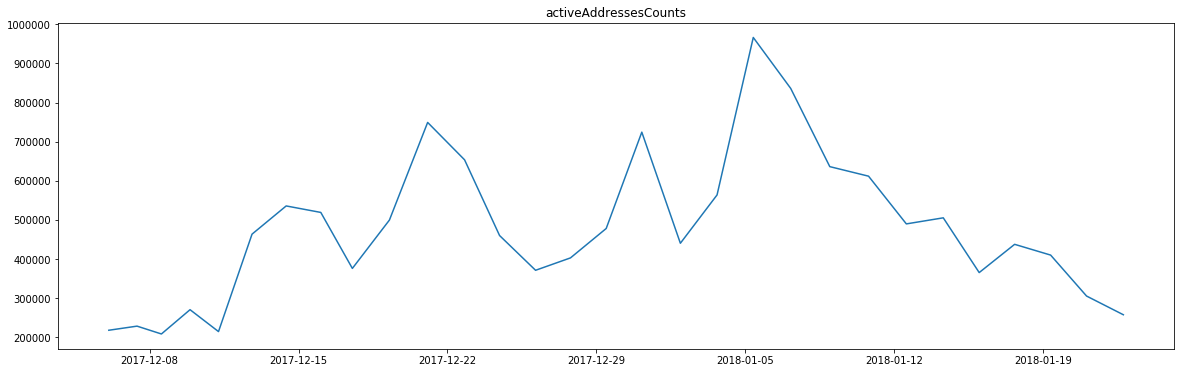

In [31]:
_ = LTC.drawGraph({S_ADDS_CNTS:''}, begin=1325, end=1355)

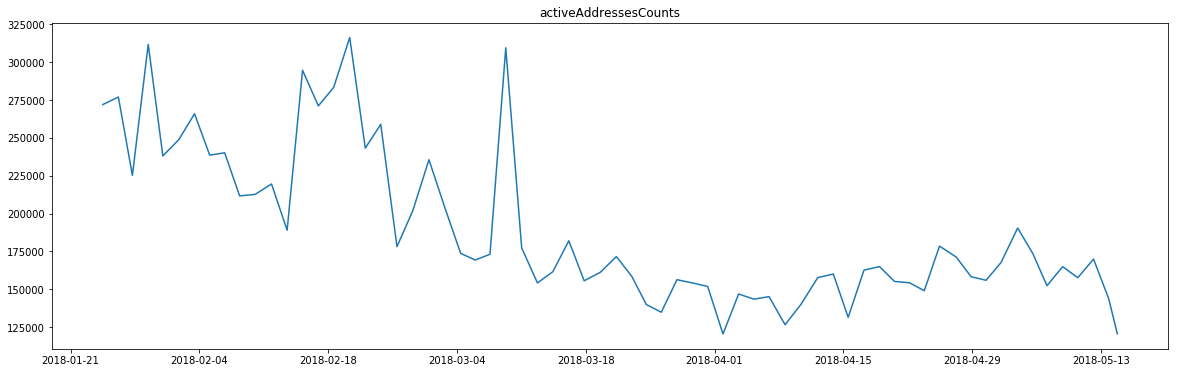

In [38]:
_ = LTC.drawGraph({S_ADDS_CNTS:''}, begin=1355)

In [99]:
grouped_BFT_deltas_between_1355k_1385k = getGroupedBalanceFlowsTxesCountsDeltasDictsNonPar(5000, 1355000, 1360000)

285
1355000 1360000
95.08771929824562%


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [105]:
grouped_BFT_deltas_between_1340k_1355k = getGroupedBalanceFlowsTxesCountsDeltasDictsNonPar(5000, 1340000, 1355000)

285
94.03508771929825%
94.3859649122807%
94.73684210526316%


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [104]:
grouped_BFT_deltas_between_1355k_1420k = getGroupedBalanceFlowsTxesCountsDeltasDictsNonPar(5000, 1355000, 1420000)

285
95.08771929824562%
95.43859649122807%
95.78947368421052%
96.14035087719299%
96.49122807017544%
96.84210526315789%
97.19298245614036%
97.54385964912281%
97.89473684210526%
98.24561403508773%
98.59649122807018%
98.94736842105263%
99.29824561403508%


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [108]:
len(add_BFT_deltas_dict_1340k_b.keys())

19268195

In [109]:
len(grouped_BFT_deltas_between_1340k_1355k[0].keys())

2586058

In [111]:
len(grouped_BFT_deltas_between_1355k_1420k[-1].keys())

551052

In [113]:
%time ALL_add_BFT_deltas_dict = sumClusterDicts([add_BFT_deltas_dict_1340k_b,] + grouped_BFT_deltas_between_1340k_1355k + grouped_BFT_deltas_between_1355k_1420k)

CPU times: user 47.8 s, sys: 868 ms, total: 48.7 s
Wall time: 48.7 s


In [114]:
len(ALL_add_BFT_deltas_dict.keys())

29964778

In [146]:
for k, v in adds_BFT_deltas_list_ser.items():
    print(k, v)
    break

201326592 [0, 2000975820, 2]


In [115]:
adds_BFT_deltas_list = list(ALL_add_BFT_deltas_dict.items())

In [151]:
adds_BFT_deltas_list_ser = {}
for k, v in ALL_add_BFT_deltas_dict.items():
    adds_BFT_deltas_list_ser[str(k)] = [int(i) for i in v]

In [152]:
json.dumps(adds_BFT_deltas_list_ser)

In [153]:
saveJson(adds_BFT_deltas_list_ser, 'litecoin_adds_BFT')

In [154]:
adds_BFT_deltas_list_ser_read = readJson('litecoin_adds_BFT')

In [156]:
del adds_BFT_deltas_list_ser_read

In [116]:
%time BFT_deltas_sorted_120 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

CPU times: user 2min 45s, sys: 2.4 s, total: 2min 48s
Wall time: 2min 47s


In [117]:
%time BFT_deltas_sorted_210 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][2], pair[1][1], pair[1][0]))

CPU times: user 3min 5s, sys: 2.46 s, total: 3min 7s
Wall time: 3min 7s


In [118]:
BFT_deltas_sorted_120[-10:]

[(83174712, array([    1067079055568, 17528143540711552,             15465])),
 (42449162, array([             1103, 19235729811256501,             51588])),
 (91502702, array([                0, 24059487860908076,             82236])),
 (212314, array([          1000000, 28215627280600000,             93945])),
 (9374, array([            30453, 30797308707893091,             52635])),
 (17176452, array([    3078617906427, 36584677724541817,            798021])),
 (158244, array([                0, 44680802413600000,            123046])),
 (285894, array([                0, 52818616529169958,             44954])),
 (49238022, array([       6252718862, 63107884079877406,            117886])),
 (106104002, array([    2427699874552, 80005660620438638,            175228]))]

In [119]:
BFT_deltas_sorted_210[-10:]

[(77606572, array([  2693719368398, 283126590432658,          146778])),
 (69202672, array([   341364131568, 271544739146494,          151034])),
 (840692, array([  158725, 29572725,   158747])),
 (60545992, array([   353707217619, 366871122719009,          171986])),
 (43843122, array([   49999600000, 10827522197850,         172564])),
 (106104002, array([    2427699874552, 80005660620438638,            175228])),
 (223214, array([         7030865, 4313207079227425,           196495])),
 (55802552, array([  31683575323611, 2502201981378401,           309367])),
 (37064522, array([   104794318300, 331089581785200,          336585])),
 (17176452, array([    3078617906427, 36584677724541817,            798021]))]

In [8]:
LTC[S_MAP_A2C].read('np')
def uniAdr2Cl(uniAdr):
    add_num, add_type = uniAdr // 10, map_addtype2num[uniAdr % 10]
    return LTC[S_MAP_A2C]['np'][add_type][add_num]

In [128]:
uniAdr2Cl(17176452)

14953

In [138]:
adds_cnt = 1000
most_flowly_addresses = set([ABFT[0] for ABFT in BFT_deltas_sorted_120[-adds_cnt:]])
most_txly_addresses = set([ABFT[0] for ABFT in BFT_deltas_sorted_210[-adds_cnt:]])

most_active_addresses = most_flowly_addresses & most_txly_addresses

In [139]:
len(most_active_addresses)

183

In [140]:
collections.Counter([uniAdr2Cl(a) for a in most_active_addresses])

Counter({14953: 149,
         19886: 1,
         47521: 1,
         63333: 1,
         65337: 1,
         83848: 3,
         93922: 1,
         133970: 1,
         147224: 1,
         247409: 1,
         454096: 1,
         479078: 1,
         482823: 1,
         565772: 1,
         583156: 1,
         610107: 1,
         635878: 1,
         743389: 1,
         818628: 1,
         875276: 1,
         894401: 1,
         929953: 1,
         936209: 1,
         937877: 1,
         990188: 1,
         1026095: 1,
         1043091: 1,
         1072727: 1,
         1072728: 1,
         4773712: 1,
         8745844: 2,
         8759649: 1})

In [7]:
LTC.getNonEmptyAddressesCounts('par')

Exception ignored in: <finalize object at 0x7f93a44026f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.py", line 463, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpvpyusagv'
Exception ignored in: <finalize object at 0x7f93a44026f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.p

100 groups are done
200 groups are done
300 groups are done
400 groups are done
500 groups are done
600 groups are done
700 groups are done
800 groups are done
900 groups are done
1000 groups are done
1100 groups are done
1200 groups are done
1300 groups are done
1400 groups are done
Work time 3496.69s


In [8]:
LTC[S_NONEMPTY_ADDS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_nonEmptyAddressesCounts_par" file


In [70]:
#LTC.drawGraph({S_NONEMPTY_ADDS:'par'})

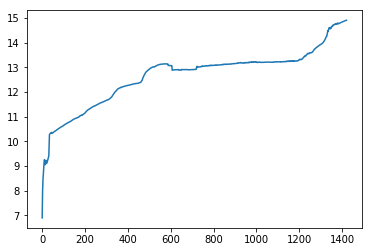

In [11]:
plt.plot(np.log(np.array(LTC[S_NONEMPTY_ADDS]['par'])))

In [6]:
for add_type in blocksci.address_type.types:
    print(LTC.chain.address_count(add_type))

18050
30176469
30176469
30176469
1198384
475807
222946
30176469
1198384


In [15]:
LTC[S_MAP_A2C].read('np')

In [16]:
LTC.getNonEmptyAddressesCounts(key='par', clusters_2b_ignored=set([14953]))

Exception ignored in: <finalize object at 0x7f93a4402700; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.py", line 463, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmp6d3xbb6k'
Exception ignored in: <finalize object at 0x7f93a4402700; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.p

100 groups are done
200 groups are done
300 groups are done
400 groups are done
500 groups are done
600 groups are done
700 groups are done
800 groups are done
900 groups are done
1000 groups are done
1100 groups are done
1200 groups are done
1300 groups are done
1400 groups are done
Work time 3469.88s


In [17]:
LTC[S_NONEMPTY_ADDS].save('par_filtering')

Saving "par_filtering" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_nonEmptyAddressesCounts_par_filtering" file


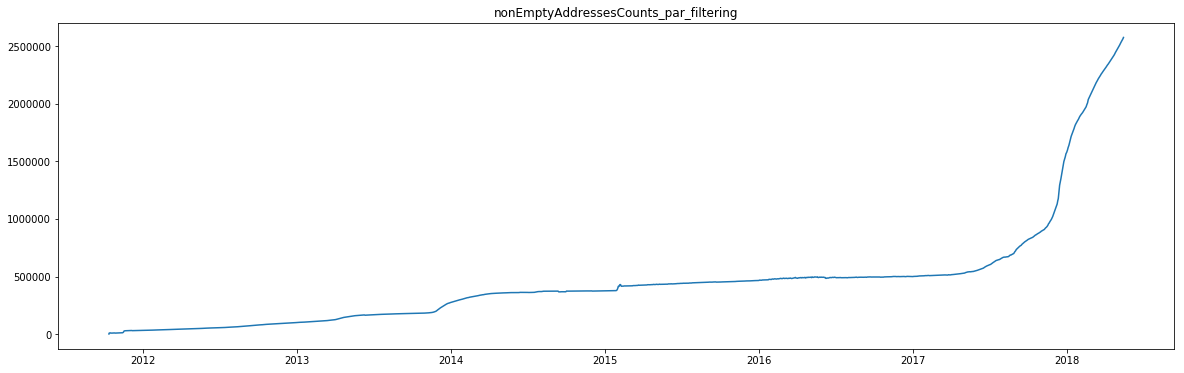

In [18]:
_ = LTC.drawGraph({S_NONEMPTY_ADDS: 'par_filtering'})

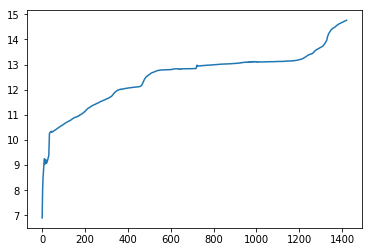

In [19]:
plt.plot(np.log(np.array(LTC[S_NONEMPTY_ADDS]['par_filtering'])))

In [34]:
def findSimpleTxesWithTarget_(block, target_cls):
    result_transactions = []
    for tx in block.txes:
        in_cls = set([add2cl(i.address) for i in tx.inputs])
        out_cls = set([add2cl(o.address) for o in tx.outputs])
        diff = in_cls ^ out_cls
        if len(diff) == 1 and list(diff)[0] in target_cls:
            result_transactions.append(tx)
    return result_transactions

class findSimpleTxesWithTarget_classEdition:
    def __init__(self, target_cls):
        self.target_cls = target_cls
    
    def DO_IT(self, block):
        return findSimpleTxesWithTarget_(block, self.target_cls)
    
import itertools
@measure_time
def findSimpleTxesWithTargetPar(chain, target_cls, start=None, end=None):
    map_function = findSimpleTxesWithTarget_classEdition(target_cls).DO_IT
    result_transactions_grouped = chain.map_blocks(map_function, start=start, end=end)
    return list(itertools.chain(*result_transactions_grouped))

In [35]:
target_cls = set([14953])
simple_txes_with_14953_to_1200k = findSimpleTxesWithTargetPar(LTC.chain, target_cls, end=1200000)

Work time 193.88s


In [39]:
simple_txes_with_14953_from_1200k = findSimpleTxesWithTargetPar(LTC.chain, target_cls, start=1200000, end=len(LTC.chain))

Work time 220.55s


In [43]:
print(len(simple_txes_with_14953_to_1200k))
print(len(simple_txes_with_14953_from_1200k))

2142067
2675872


In [74]:
simple_txes_with_14953_to_1200k_ser = [tx.index for tx in simple_txes_with_14953_to_1200k]
simple_txes_with_14953_from_1200k_ser = [tx.index for tx in simple_txes_with_14953_from_1200k]

In [75]:
saveJson(simple_txes_with_14953_to_1200k_ser, 'litecoin_simple_txes_with_14953_to_1200k')
saveJson(simple_txes_with_14953_from_1200k_ser, 'litecoin_simple_txes_with_14953_from_1200k')

In [4]:
simple_txes_with_14953_to_1200k_ser2 = readJson('litecoin_simple_txes_with_14953_to_1200k')
simple_txes_with_14953_from_1200k_ser2 = readJson('litecoin_simple_txes_with_14953_from_1200k')

In [5]:
simple_txes_with_14953_to_1200k = [LTC.chain.tx_with_index(ind) for ind in simple_txes_with_14953_to_1200k_ser2]
simple_txes_with_14953_from_1200k = [LTC.chain.tx_with_index(ind) for ind in simple_txes_with_14953_from_1200k_ser2]

In [80]:
LTC.chain.tx_with_index(simple_txes_with_14953_from_1200k_ser2[-1]) == simple_txes_with_14953_from_1200k[-1]

True

In [6]:
friend_candidates = set()
for tx in simple_txes_with_14953_to_1200k + simple_txes_with_14953_from_1200k:
    in_cls = set([add2cl(i.address) for i in tx.inputs])
    friend_candidates.update(in_cls)

TypeError: add2cl() missing 1 required positional argument: 'map_address2cluster'

In [ ]:
len(friend_candidates)

In [63]:
friend_candidates_14953 = friend_candidates

In [10]:
simple_txes_with_14953_set = set(simple_txes_with_14953_to_1200k + simple_txes_with_14953_from_1200k)
simple_txes_indes_with_14953_set = set([tx.index for  tx in simple_txes_with_14953_to_1200k +
                                        simple_txes_with_14953_from_1200k])

In [11]:
for tx in simple_txes_with_14953_set:
    print(tx)
    break
for tx in simple_txes_indes_with_14953_set:
    print(tx)
    break

Tx(len(txins)=1, len(txouts)=2, size_bytes=225, block_height=1339839, tx_index=16777216)
16777216


In [65]:
@measure_time
def leaveTrueCandidates(blocks, candidates_set, good_txes_set):
    for b in blocks:
        for tx in b:
            if not tx in good_txes_set:
                io_cls = set([add2cl(i.address) for i in tx.inputs] + [add2cl(o.address) for o in tx.outputs])
                candidates_set.difference_update(io_cls)
    return candidates_set

In [67]:
friend_candidates_14953_copy = friend_candidates_14953.copy()

In [71]:
len(friend_candidates_14953_copy)

0

In [69]:
true_friends_14953 = leaveTrueCandidates(LTC.blocks, friend_candidates_14953_copy, simple_txes_with_14953_set)

Work time 1584.32s


In [70]:
len(true_friends_14953)

0

In [73]:
len(simple_txes_with_14953_set)

4817939

In [41]:
all_txes_cnt_to_1200k = sum([b.tx_count for b in LTC.blocks[:1200000]])
all_txes_cnt_from_1200k = sum([b.tx_count for b in LTC.blocks[1200000:]])

In [42]:
print(all_txes_cnt_to_1200k)
print(all_txes_cnt_from_1200k)

9688999
14599948


In [16]:
friend_candidates_list = list(friend_candidates)

In [19]:
friend_candidates_list[0]

NameError: name 'friend_candidates_list' is not defined

In [17]:
LTC[S_MAP_A2C].read('np')

In [11]:
LTC.getNonEmptyClustersCounts('par', clusters_2b_ignored=friend_candidates)

Work time 727.92s


In [12]:
LTC[S_NONEMPTY_CLS].save('par_filtering')

Saving "par_filtering" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_nonEmptyClustersCounts_par_filtering" file


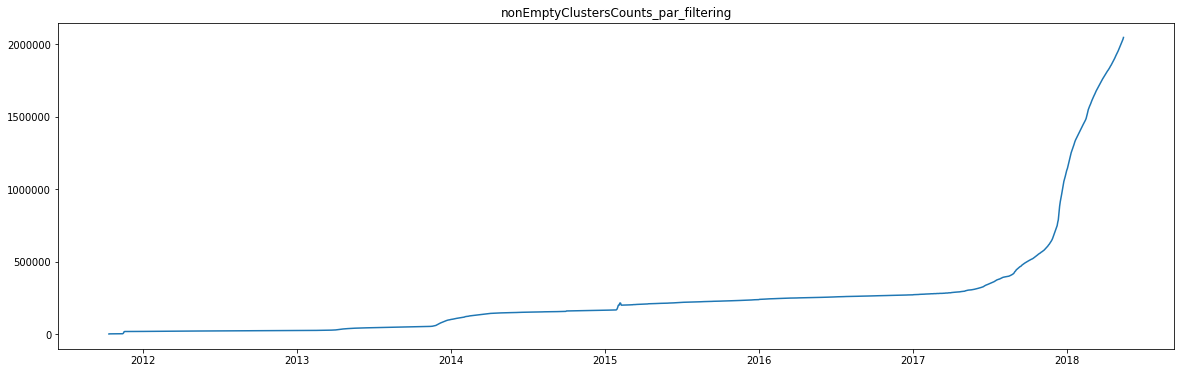

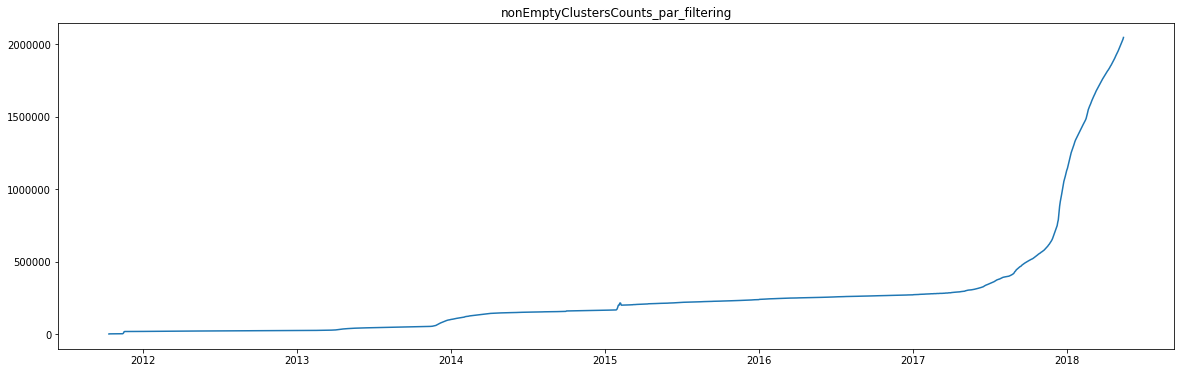

In [13]:
_ = LTC.drawGraph({S_NONEMPTY_CLS:'par_filtering'})

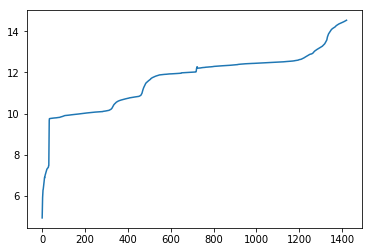

In [14]:
plt.plot(np.log(np.array(LTC[S_NONEMPTY_CLS]['par_filtering'])))

In [65]:
#LTC.getNonEmptyClustersCounts('par', txes_2b_ignored=simple_txes_indes_with_14953_set)

In [20]:
LTC[S_NONEMPTY_CLS].save('par_filteringTxes')

Saving "par_filteringTxes" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_nonEmptyClustersCounts_par_filteringTxes" file


In [23]:
LTC[S_NONEMPTY_CLS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_nonEmptyClustersCounts'...
  Got 'int1000b_nonEmptyClustersCounts_par.json', key is 'par'
  Got 'int1000b_nonEmptyClustersCounts_par_filtering.json', key is 'par_filtering'
  Got 'int1000b_nonEmptyClustersCounts_par_filteringTxes.json', key is 'par_filteringTxes'
There is already par_filteringTxes version of data, stop
Finish


In [69]:
#_ = LTC.drawGraph({S_NONEMPTY_CLS:'par', S_NONEMPTY_CLS:'par_filtering', S_NONEMPTY_CLS:'par_filteringTxes'})

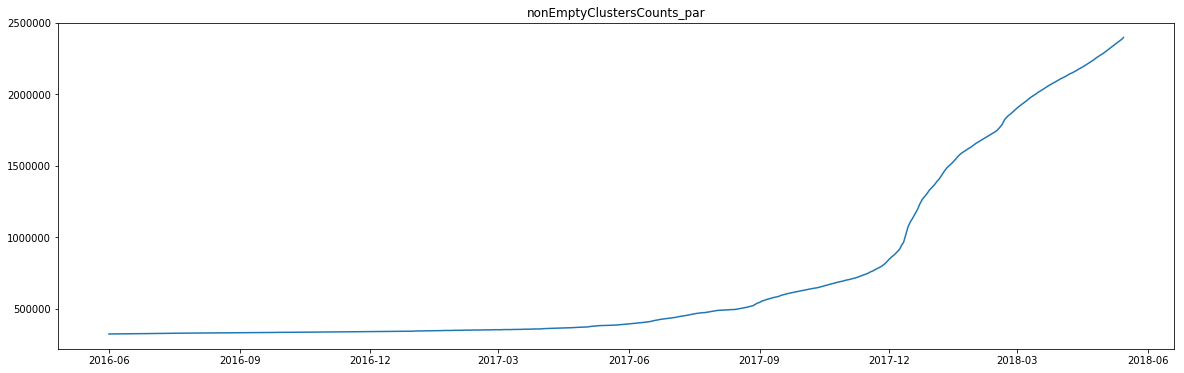

In [39]:
_ = LTC.drawGraph({S_NONEMPTY_CLS:'par'}, begin=1000)

In [66]:
#_ = LTC.drawGraph({S_NONEMPTY_CLS:'par_filtering'})

In [67]:
#_ = LTC.drawGraph({S_NONEMPTY_CLS:'par_filteringTxes'})

In [68]:
#plt.figure(figsize=(20,5))
#plt.plot((np.array(LTC[S_NONEMPTY_CLS]['par_filteringTxes']) - np.array(LTC[S_NONEMPTY_CLS]['par'])))

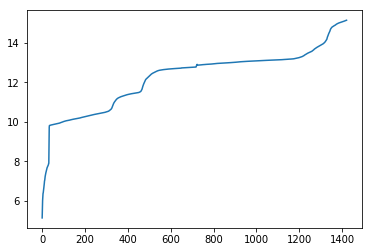

In [22]:
plt.plot(np.log(np.array(LTC[S_NONEMPTY_CLS]['par_filteringTxes'])))

In [103]:
for add_type in blocksci.address_type.types:
    local_map = LTC[S_MAP_A2C]['np'][add_type]
    print(max(local_map[1:local_map[0]+1]))

16956
8745449
8745449
8745449
9089252
9089286
9312232
8745449
9089252


In [102]:
len(LTC.cl_mgr.clusters())

9312234

In [ ]:
##########################################

In [35]:
LTC[S_MAP_A2C].read('np')

There is already np version of data, stop


In [51]:
%time newborns_set = getNewbornClusters(LTC.chain, 1320000, LTC[S_MAP_A2C]['np'], 1000, 1200, 1320)

Going for oldborns!
Going for newborns!
CPU times: user 3min 56s, sys: 6.68 s, total: 4min 3s
Wall time: 4min 1s


In [52]:
len(newborns_set)

1753538

In [54]:
set([1, 2]) - set([2, 3, 4, 5 ,7])

{1}

In [62]:
%time txes_with_newborns =  getTxesWithNewBornPar(LTC.chain, LTC[S_MAP_A2C]['np'], newborns_set, start=1200000, end=1320000)

CPU times: user 5min 13s, sys: 5.39 s, total: 5min 19s
Wall time: 5min 50s


In [63]:
len(txes_with_newborns)

3016206

In [73]:
def add2cl(address):
    return LTC[S_MAP_A2C]['np'][address.type][address.address_num]

def printTxCls(chain, tx_ind):
    tx = chain.tx_with_index(tx_ind)
    for i in tx.inputs:
        print(add2cl(i.address))
    print('------')
    for i in tx.outputs:
        print(add2cl(i.address))

In [78]:
printTxCls(LTC.chain, txes_with_newborns[20000])

1218553
------
1218641


In [82]:
newborns_set_copy = newborns_set.copy()
newborn2mother = {}
for tx_ind in txes_with_newborns:
    tx = LTC.chain.tx_with_index(tx_ind)
    in_cls = set([add2cl(o.address) for o in tx.inputs])
    if len(in_cls & newborns_set_copy) > 0:
        print("Achtung!")
    out_cls = set([add2cl(o.address) for o in tx.outputs])
    babies = out_cls & newborns_set_copy
    for baby in babies:
        newborn2mother[baby] = list(in_cls)
    newborns_set_copy.difference_update(babies)

In [83]:
%time new_born_mothers = collections.Counter(itertools.chain(*newborn2mother.values()))

CPU times: user 524 ms, sys: 0 ns, total: 524 ms
Wall time: 521 ms


In [84]:
len(new_born_mothers)

895704

In [85]:
new_born_mothers.most_common(10)

[(14953, 402459),
 (2131691, 6216),
 (1072727, 4309),
 (2275725, 2687),
 (1583605, 1924),
 (1583602, 1520),
 (2567908, 1113),
 (1072728, 1017),
 (1056618, 490),
 (1068847, 403)]

In [24]:
LTC[S_MAP_A2C].read('np')

In [28]:
LTC.getNonEmptyClustersCounts('par', filtering=True)

Exception ignored in: <finalize object at 0x7f653f58d6f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.py", line 463, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpig5aczqa'
Exception ignored in: <finalize object at 0x7f653f58d6f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.p

Work time 430.35s


In [29]:
LTC[S_NONEMPTY_CLS].save('par_filteringUnspents')

Saving "par_filteringUnspents" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_nonEmptyClustersCounts_par_filteringUnspents" file


In [31]:
LTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


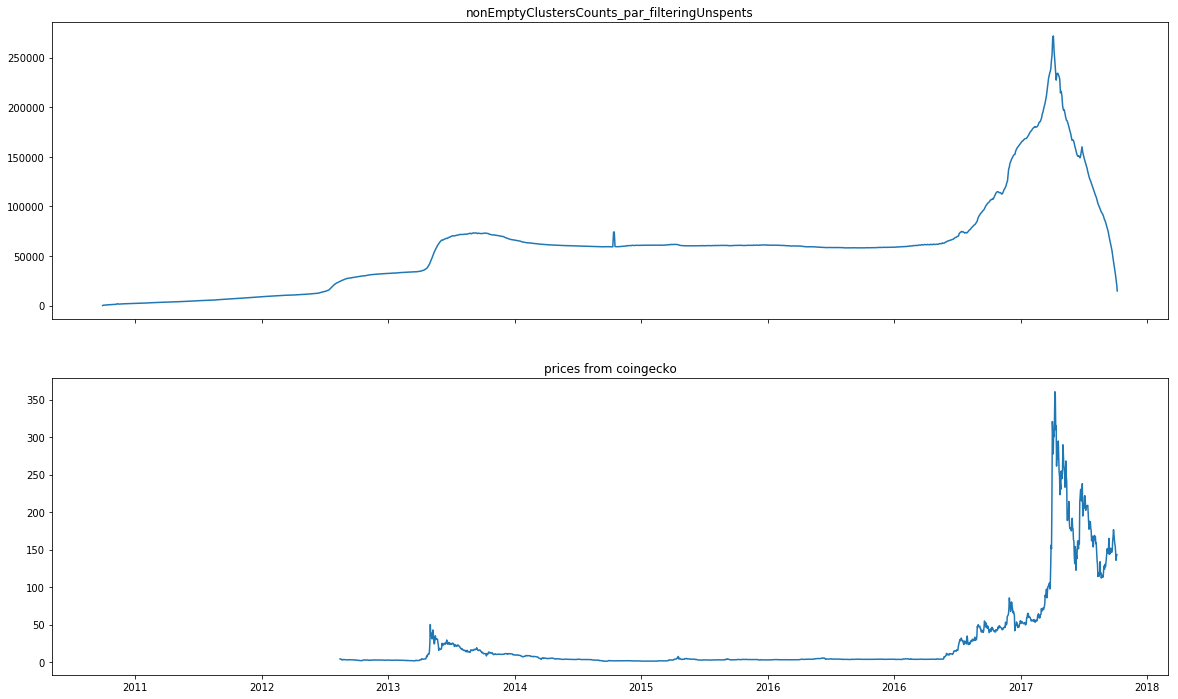

In [32]:
_ = LTC.drawGraph({S_NONEMPTY_CLS: 'par_filteringUnspents'}, prices_key='coingecko')

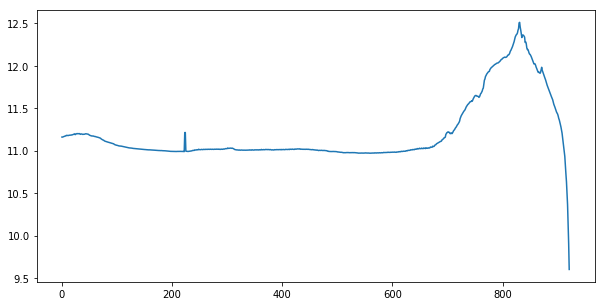

In [34]:
plt.figure(figsize=(10,5))
plt.plot(np.log(np.array(LTC[S_NONEMPTY_CLS]['par_filteringUnspents'])[500:]))

In [24]:
#LTC.blocks[300000:300100].bits

In [12]:
LTC.getDifficulties()

Work time 0.78s


In [23]:
#LTC.drawGraph({S_DIFFS:''})

In [33]:
ncs = pd.Series(LTC[S_NCS][''][320:])

/home/ubuntu/thesis_work/my_tools.py:21: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
/home/ubuntu/thesis_work/my_tools.py:22: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  coinbase_outs = [b.coinbase_tx.outputs for b in blocks]


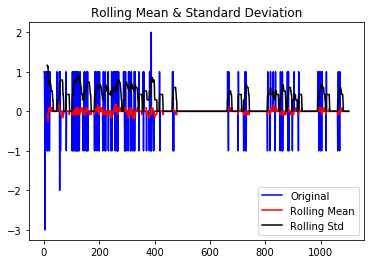

Results of Dickey-Fuller Test:
Test Statistic                  -20.934201
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    1096.000000
Critical Value (1%)              -3.436331
Critical Value (10%)             -2.568176
Critical Value (5%)              -2.864181
dtype: float64


In [35]:
test_stationarity(getDiff(ncs))

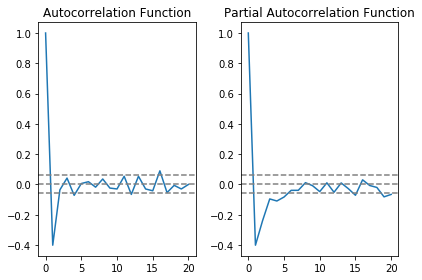

In [36]:
drawAcfPacf(getDiff(ncs))

RMSE: 0.3177


0.31771423143082783

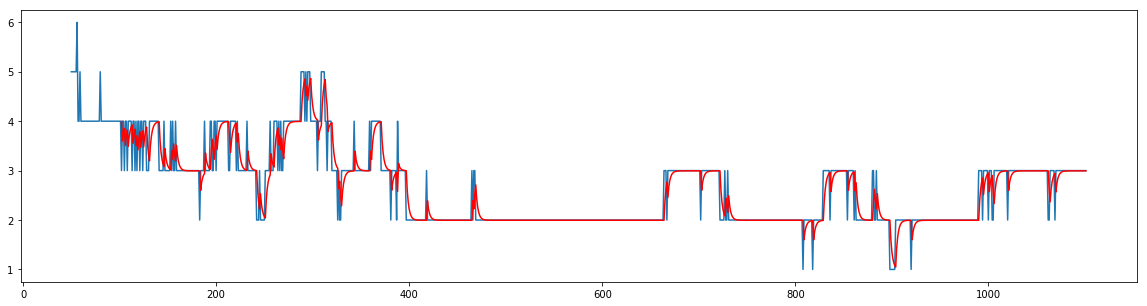

In [44]:
arimaPredictInSampleRMSE(ncs[50:], (1, 1, 1))

Test RMSE: 0.3270
CPU times: user 6min 10s, sys: 13min 51s, total: 20min 1s
Wall time: 2min 33s


0.32704033856174819

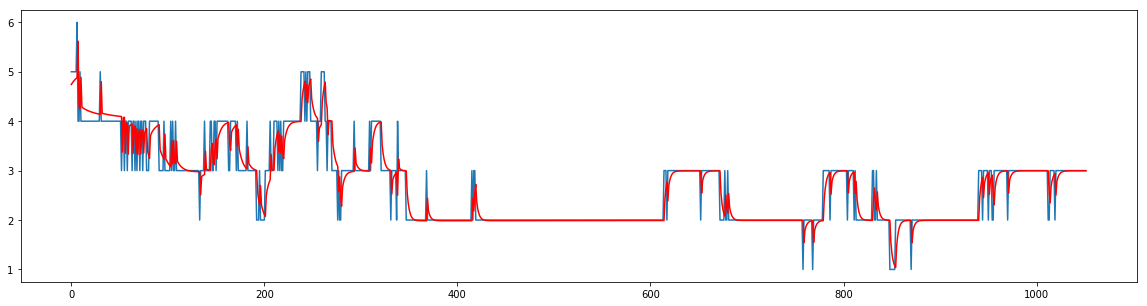

In [43]:
%time arimaWalkForwardValidation(ncs.values, size=50, arima_order=(1, 1, 1))

RMSE: 0.3213


/home/ubuntu/thesis_work/my_tools.py:107: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,halflife=1).mean()
  ewma_prediction = pd.ewma(series.shift(), halflife=halflife)


0.32133207626489546

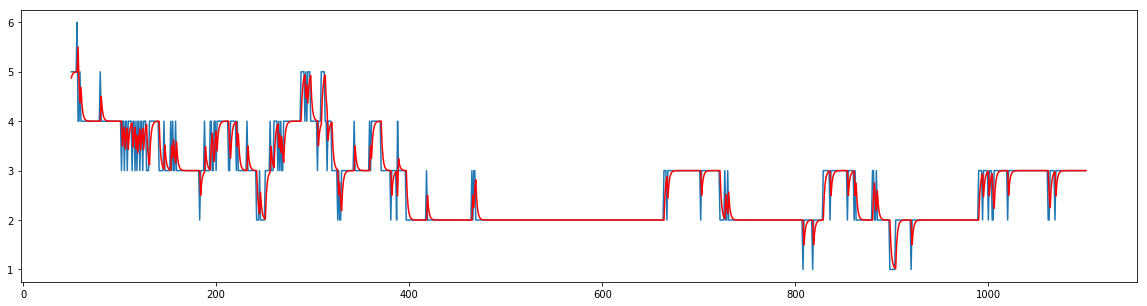

In [45]:
ewmaPreditcionRMSE(ncs, 50, 1)

In [11]:
prices_df = LTC.prices['coingecko']
needed_times = [pd.to_datetime(t.date()) for t in LTC.times]
sync_prices_df = prices_df[pd.to_datetime(prices_df['times']).isin(needed_times)]
sync_prices = list(sync_prices_df['prices'])
sync_prices_with_nones = [None,] * (len(LTC.times) - len(sync_prices)) + sync_prices

In [12]:
sync_prices_with_nones[-5:]

[163.32915289318768,
 155.1768238426219,
 135.88423784689235,
 141.33580863523432,
 143.38873235912763]

In [13]:
sync_prices_df[-5:]

,prices,times
1834,163.329153,2018-05-08 00:00:00 UTC
1836,155.176824,2018-05-10 00:00:00 UTC
1838,135.884238,2018-05-12 00:00:00 UTC
1839,141.335809,2018-05-13 00:00:00 UTC
1840,143.388732,2018-05-14 00:00:00 UTC


In [14]:
LTC.times[-5:]

[datetime.datetime(2018, 5, 8, 20, 12, 54),
 datetime.datetime(2018, 5, 10, 11, 41, 17),
 datetime.datetime(2018, 5, 12, 4, 51, 37),
 datetime.datetime(2018, 5, 13, 20, 22, 59),
 datetime.datetime(2018, 5, 14, 18, 57, 25)]

In [15]:
LTC[S_SYNC_PRICES].v['c_byDay'] = sync_prices_with_nones
LTC[S_SYNC_PRICES].save('c_byDay')

Saving "c_byDay" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_synchronizedPrices_c_byDay" file


In [8]:
LTC.showDataAndVersions()

'nonEmptyClustersCounts' versions:
  'par'
  'log'
  'par_filteringTxes'
  'par_filteringUnspents'
  'par_filtering'
'blockDifficulties' versions:
'synchronizedPrices' versions:
'nonEmptyAddressesCounts' versions:
'unspents' versions:
  'par'
'map_address2cluster' versions:
'relativeFlowVolumes' versions:
  'par'
  'par_cutTop1.5'
'activeAddressesCounts' versions:
'NacamotoCoefs' versions:
  ''
'flowAndIncomeVolumes' versions:
'activeClustersCounts' versions:
  'oldway_400k'
  'oldway'
  'usingNpMap'
'fees' versions:
  'par'
  'log'
'miners' versions:
'ginisOfClustersWealth' versions:
  ''
  'log21'
'revenues' versions:


In [10]:
LTC[S_SYNC_PRICES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_synchronizedPrices'...
  Got 'int1000b_synchronizedPrices_c_byDay.json', key is 'c_byDay'
  Got 'int1000b_synchronizedPrices_log.json', key is 'log'
Finish


In [13]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'par', S_FEES:'par',
                              S_UNSPENTS:'par', S_NONEMPTY_CLS:'log', S_SYNC_PRICES: 'log', S_CLS_CNTS: 'usingNpMap'})
tag_mean = LTC.rollingMeanAllMetrics(allMetrics_tag=tag_l, common_win=5)

Gathered under tag 'nonEmptyClustersCounts=log_relativeFlowVolumes=par_synchronizedPrices=log_activeClustersCounts=usingNpMap_fees=par_unspents=par_ginisOfClustersWealth=log21_NacamotoCoefs='


/home/ubuntu/thesis_work/my_tools.py:1099: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


In [15]:
bdf = LTC.allMetrics[tag_mean].copy()
bdf.dropna(inplace=True)

In [16]:
bdf.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.021716,0.223724,0.661937,-0.581332,0.085363,-0.026569,-0.101010
activeClustersCounts,0.021716,1.000000,0.442526,0.241745,0.551354,0.124885,0.764220,0.792302
fees,0.223724,0.442526,1.000000,0.147342,-0.126345,0.200669,0.265506,0.323271
ginisOfClustersWealth,0.661937,0.241745,0.147342,1.000000,-0.389758,0.213079,0.226544,0.088267
nonEmptyClustersCounts,-0.581332,0.551354,-0.126345,-0.389758,1.000000,-0.145550,0.578161,0.566133
relativeFlowVolumes,0.085363,0.124885,0.200669,0.213079,-0.145550,1.000000,0.243745,0.056687
synchronizedPrices,-0.026569,0.764220,0.265506,0.226544,0.578161,0.243745,1.000000,0.733783
unspents,-0.101010,0.792302,0.323271,0.088267,0.566133,0.056687,0.733783,1.000000


In [17]:
import scipy
for col in bdf.columns:
    if col != 'times':
        print(col)
        print(scipy.stats.pearsonr(bdf[S_SYNC_PRICES], bdf[col]))

NacamotoCoefs
(-0.026569152716417601, 0.39546965425576353)
activeClustersCounts
(0.76421953805123277, 4.6003685926982773e-197)
fees
(0.26550645278385915, 5.3515481410575043e-18)
ginisOfClustersWealth
(0.2265440857898082, 2.1402520350090745e-13)
nonEmptyClustersCounts
(0.578161100960632, 1.7820245634958226e-92)
relativeFlowVolumes
(0.24374464339055274, 2.4970874303721812e-15)
synchronizedPrices
(1.0, 0.0)
unspents
(0.73378342713658962, 6.0894462065117386e-174)


In [18]:
columns = [col for col in bdf.columns if col != 'times']
for comb in itertools.combinations(columns, 2):
        print(list(comb))
        print(scipy.stats.pearsonr(bdf[comb[0]], bdf[comb[1]])[1])

['NacamotoCoefs', 'activeClustersCounts']
0.487372417417
['NacamotoCoefs', 'fees']
4.29372522476e-13
['NacamotoCoefs', 'ginisOfClustersWealth']
3.17986704037e-130
['NacamotoCoefs', 'nonEmptyClustersCounts']
1.04305193717e-93
['NacamotoCoefs', 'relativeFlowVolumes']
0.00624529423342
['NacamotoCoefs', 'synchronizedPrices']
0.395469654256
['NacamotoCoefs', 'unspents']
0.00120269173405
['activeClustersCounts', 'fees']
2.16197214786e-50
['activeClustersCounts', 'ginisOfClustersWealth']
4.26639075459e-15
['activeClustersCounts', 'nonEmptyClustersCounts']
1.41890962425e-82
['activeClustersCounts', 'relativeFlowVolumes']
6.09510797474e-05
['activeClustersCounts', 'synchronizedPrices']
4.6003685927e-197
['activeClustersCounts', 'unspents']
9.63525058239e-222
['fees', 'ginisOfClustersWealth']
2.16521892689e-06
['fees', 'nonEmptyClustersCounts']
4.98440195597e-05
['fees', 'relativeFlowVolumes']
9.00642929592e-11
['fees', 'synchronizedPrices']
5.35154814106e-18
['fees', 'unspents']
2.31343866548e-

In [27]:
bdf[S_NCS][:3]

345    4.0
346    4.0
347    4.0
Name: NacamotoCoefs, dtype: float64